# Logistic Regression

By Charles Patterson

## Data Preparation

### Business Overview

I feel as though the business case use is pretty straight forward.  I have list of just over 3,700 stocks and the goal would be to provide unique insight about the market.  For this project I will define stocks as "Bust", "Profitable", "Home Runs" and "Best".  I have one hot encoded two variables Profitable, and Home Run.  For a stock to be a "Bust", the stock must not be profitable, or a home run.  To be "Profitable" the stock must be profitable but not a home run.  To be a Home Run, the company needs to be a Home Run but not profitable.  Finally, to be a "Best" stock, the stock must be a Home Run and a profitable one.

Thus, anyone looking to invest in the stock market, particularily someone looking to invest in higher risk ones, such as stocks the year they IPO, would be interested in the results.  This is very definitily analysis that would be for off line analysis as opposed to deployment.  

In [1]:
#Read in the data
import pandas as pd
import numpy as np

original = pd.read_csv("IPODataFull.csv", encoding = "unicode_escape", low_memory = False)

In [2]:
#Weed out the unnecessary variables
import copy
df = copy.deepcopy(original)
all_vars = ["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "Sector", "CEOAge", "stateCountry", "HomeRun", "Profitable"]
predictors = ["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "Sector", "CEOAge", "stateCountry"]

df = original[all_vars]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 9 columns):
DaysBetterThanSP    3762 non-null int64
daysProfit          3762 non-null int64
Year                3762 non-null int64
MarketCap           3585 non-null float64
Sector              3046 non-null object
CEOAge              3008 non-null float64
stateCountry        2885 non-null object
HomeRun             3762 non-null int64
Profitable          3762 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 264.6+ KB


In [3]:
from sklearn.impute import KNNImputer
import copy

knn_obj = KNNImputer(n_neighbors=8)

temp = df[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "CEOAge", "HomeRun", "Profitable"]].to_numpy()

knn_obj.fit(temp)
temp_imputed = knn_obj.transform(temp)

df_imputed = copy.deepcopy(df) 
df_imputed[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "CEOAge", "HomeRun", "Profitable"]] = temp_imputed
df = df_imputed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 9 columns):
DaysBetterThanSP    3762 non-null float64
daysProfit          3762 non-null float64
Year                3762 non-null float64
MarketCap           3762 non-null float64
Sector              3046 non-null object
CEOAge              3762 non-null float64
stateCountry        2885 non-null object
HomeRun             3762 non-null float64
Profitable          3762 non-null float64
dtypes: float64(7), object(2)
memory usage: 264.6+ KB


In [4]:
#I got this code from 
#https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa

#instantiate both packages to use
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = ["Sector", "stateCountry"]

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df[columns])
    
# impute data and convert 
encoded_data = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)
print(encoded_data.info())
df = encoded_data

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Imputing row 1/3762 with 0 missing, elapsed time: 1.849
Imputing row 101/3762 with 0 missing, elapsed time: 1.851
Imputing row 201/3762 with 0 missing, elapsed time: 1.853
Imputing row 301/3762 with 0 missing, elapsed time: 1.854
Imputing row 401/3762 with 2 missing, elapsed time: 1.857
Imputing row 501/3762 with 0 missing, elapsed time: 1.859
Imputing row 601/3762 with 0 missing, elapsed time: 1.860
Imputing row 701/3762 with 0 missing, elapsed time: 1.862
Imputing row 801/3762 with 0 missing, elapsed time: 1.863
Imputing row 901/3762 with 0 missing, elapsed time: 1.865
Imputing row 1001/3762 with 0 missing, elapsed time: 1.867
Imputing row 1101/3762 with 1 missing, elapsed time: 1.870
Imputing row 1201/3762 with 0 missing, elapsed time: 1.872
Imputing row 1301/3762 with 0 missing, elapsed time: 1.875
Imputing row 1401/3762 with 0 missing, elapsed time: 1.878
Imputing row 1501/3762 with 0 missing, elapsed time: 1.880
Imputing row 1601/3762 with 0 missing, elapsed time: 1.882
Imputing 

In [5]:
print(df.describe())
print("===============")
print(df.info())

       DaysBetterThanSP   daysProfit         Year     MarketCap       Sector  \
count       3762.000000  3762.000000  3762.000000  3.762000e+03  3762.000000   
mean         103.753057   138.153642  2008.578416  6.505291e+09     5.927698   
std           34.461156   100.677813     6.532543  2.844108e+10     2.670823   
min            0.000000     0.000000  1996.000000  7.930700e+04     0.000000   
25%           96.000000    32.000000  2004.000000  1.665677e+08     4.000000   
50%          116.000000   143.000000  2010.000000  6.607852e+08     6.000000   
75%          126.000000   247.000000  2014.000000  2.927402e+09     7.000000   
max          170.000000   262.000000  2018.000000  7.270000e+11    11.000000   

            CEOAge  stateCountry      HomeRun   Profitable  
count  3762.000000   3762.000000  3762.000000  3762.000000  
mean     55.034556     40.426369     0.069378     0.527645  
std       7.088034     25.898695     0.254130     0.499302  
min      24.000000      0.000000   

In [6]:
#Divide data into an 80/20 split using sklearn

if 'HomeRun' in df:
    y1 = df['HomeRun'].values # get the labels we want
    y2 = df['Profitable'].values
    del df['HomeRun'] # get rid of the class label
    del df['Profitable']
    X1 = df[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "Sector", "CEOAge", "stateCountry"]].to_numpy()
    X2 = df[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "Sector", "CEOAge", "stateCountry"]].to_numpy()

#I got this from class
from sklearn.model_selection import ShuffleSplit
num_cv_iterations = 3
num_instances = len(df)
cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size  = 0.2) 
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


### Argument for 80/20 split

I beleive generally that an 80/20 split is a good method for spliting up the dataset.  However, there sre some exceptions to this rule that this dataset could incur.  The big issue this dataset incurs in time serier.  Since in the main dataset, the data show that stock price of the stock everyday for a year.  If I were going to utilize this data, then I would argue that the split was not wise, but this is not how I am using the dataset.  Instead, I am looking for attribuites of the stocks that show when they might leap in price or are likily to be profitable.  Therefore, the 80/20 split will work well for my analysis.

## Modeling

The first thing I plan to do, is get all of the code for logistic regression and the optimization code from class.

In [7]:
#Build the logistic regression classifier
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20, C=0.01, regularization = None):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.r = regularization
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return expit(theta)
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

In [8]:
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_bias=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
            if not (self._get_reg_gradient() is None):
                gradient[1:] += self.C * self._get_reg_gradient()
        
        return gradient/float(len(y))
    
    #This the how I plan to adjust the code for the desired regularization
    def _get_reg_gradient(self):
        if (self.r == 'L1'): 
            return -np.norm(self.w_[1:])
        
        elif (self.r == 'L2'): 
            return -np.squared(self.w_[1:])
        
        elif (self.r == 'EN'): 
            return -(np.square(self.w_[1:]) + np.norm(self.w_[1:]))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

In [9]:
from scipy.optimize import minimize_scalar
from scipy.special import expit
import copy
class LineSearchLogisticRegression(BinaryLogisticRegression):
    
    # define custom line search for problem
    
    @staticmethod
    def objective_function(eta,X,y,w,grad,C):
        wnew = w - grad*eta
        g = expit(X @ wnew)
        return -np.sum(np.log(g[y==1]))-np.sum(np.log(1-g[y==0])) + C*sum(wnew**2)
    
        
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = -self._get_gradient(Xb,y)
            # minimization inopposite direction
            
            # do line search in gradient direction, using scipy function
            opts = {'maxiter':self.iters/50} # unclear exactly what this should be
            res = minimize_scalar(self.objective_function, # objective function to optimize
                                  bounds=(self.eta/1000,self.eta*10), #bounds to optimize
                                  args=(Xb,y,self.w_,gradient,self.C), # additional argument for objective function
                                  method='bounded', # bounded optimization for speed
                                  options=opts) # set max iterations
            
            eta = res.x # get optimal learning rate
            self.w_ -= gradient*eta # set new function values
            # subtract to minimize

In [10]:
class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        if not (self._get_reg_gradient() is None):
            gradient[1:] += self.C * self._get_reg_gradient()
        
        return gradient

In [11]:
from numpy.linalg import pinv
class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        if not (self._get_reg_gradient() is None):
            gradient[1:] += self.C * self._get_reg_gradient()
        
        return pinv(hessian) @ gradient

In [30]:
class MSELogisticRegression(BinaryLogisticRegression):
    def objective_function():
        return np.square(y[idx]-self.predict_proba(X[idx],add_bias=False)).mean()
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = -self._get_gradient(Xb,y)
            # minimization inopposite direction
            
            # do line search in gradient direction, using scipy function
            opts = {'maxiter':self.iters/50} # unclear exactly what this should be
            res = minimize_scalar(self.objective_function, # objective function to optimize
                                  bounds=(self.eta/1000,self.eta*10), #bounds to optimize
                                  args=(Xb,y,self.w_,gradient,self.C), # additional argument for objective function
                                  method='bounded', # bounded optimization for speed
                                  options=opts) # set max iterations
            
            eta = res.x # get optimal learning rate
            self.w_ -= gradient*eta # set new function values
            # subtract to minimize

Now, it is time to actually add the functionality desired.

In [31]:
#Ability to choose optimization technique when class is instantiated: 
#Steepest Descent, Stochastic Gradient Descent, or Newton's Method. 
class LogReg:
    def __init__(self, eta, iterations=20, solver="sd", regularization = None, C=1):
        self.eta = eta
        self.iters = iterations
        self.solver=solver
        self.regularization = regularization
        self.C=C
        if(self.regularization == "Lasso"):
            self.r = "L1"
        
        if(self.regularization == "Ridge"):
            self.r = "L2"
        
        if(self.regularization == "Elastic_Net"):
            self.r = "EN"
            
        if(self.solver == "sd"):
            self.s = LineSearchLogisticRegression(eta, self.iters)
            
        if(self.solver == "sgd"):
            self.s = StochasticLogisticRegression(eta, self.iters)
            
        if(self.solver == "nm"):
            self.s = HessianBinaryLogisticRegression(eta, self.iters)
        
        if(self.solver == "mse"):
            self.s = MSELogisticRegression(eta, self.iters)
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self, X, y):
        return self.s.fit(X,y)
    
    def predict(self,X):
        return self.s.predict(X)

In [32]:
#I got this from class
from sklearn import metrics as mt
    
lr = LogReg(0.01, iterations=80, solver="sgd", regularization = "Elastic_Net", C=1e-3)

iter_num = 0
# the indices are the rows used for training and testing in each iteration
print("Predicting HomeRun")
for train_indices, test_indices in cv_object.split(X1,y1): 
    X_train = X1[train_indices]
    y_train = y1[train_indices]
    X_test = X1[test_indices]
    y_test = y1[test_indices]

    lr.fit(X_train,y_train) 
    y_hat = lr.predict(X_test)

    acc = mt.accuracy_score(y_test,y_hat)
    print(iter_num, "accuracy", acc )
    iter_num+=1

iter_num = 0
print("\nPredicting Profitable")
for train_indices, test_indices in cv_object.split(X2,y2): 
    X_train = X2[train_indices]
    y_train = y2[train_indices]
    X_test = X2[test_indices]
    y_test = y2[test_indices]

    # train the reusable logisitc regression model on the training data
    lr.fit(X_train,y_train)  # train object
    y_hat = lr.predict(X_test) # get test set precitions

    acc = mt.accuracy_score(y_test,y_hat)
    print(iter_num, "accuracy", acc )
    iter_num+=1

Predicting HomeRun
0 accuracy 0.9110225763612217
1 accuracy 0.9335989375830013
2 accuracy 0.9349269588313412

Predicting Profitable
0 accuracy 0.5232403718459495
1 accuracy 0.5112881806108898
2 accuracy 0.4634794156706507


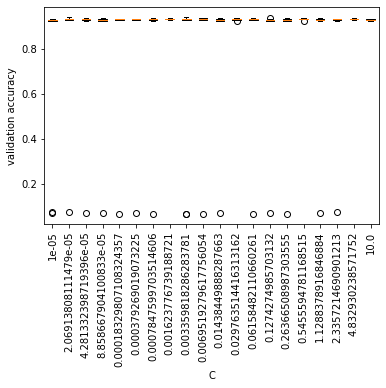

CPU times: user 1min 7s, sys: 399 ms, total: 1min 7s
Wall time: 35.5 s


In [33]:
%%time
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

# alternatively, we can also graph out the values using boxplots
num_cv_iterations = 10
num_instances = len(y1)
cv_object1 = ShuffleSplit(n_splits=num_cv_iterations, test_size  = 0.5)

def lr_explor(cost):
    lr_clf = LogReg(eta=0.1,iterations=10, C=float(cost)) # get object
    acc = []
    for iter_num, (train_indices, test_indices) in enumerate(cv_object1.split(X1,y1)):
        lr_clf.fit(X1[train_indices],y1[train_indices])  # train object
        y_hat = lr_clf.predict(X1[test_indices]) # get test set predictions
        acc.append(mt.accuracy_score(y1[test_indices],y_hat))
        
    acc = np.array(acc)
    return acc

costs = np.logspace(-5,1,20)
accs = []
for c in costs:
    accs.append(lr_explor(c))
    
plt.boxplot(accs)
plt.xticks(range(1,len(costs)+1),costs,rotation='vertical')
plt.xlabel('C')
plt.ylabel('validation accuracy')
plt.show()

From the graph above, I think I can say that finding a good value for C is difficult.  Part of the problem is from this data set, it is challenging for us to predict what the values of C should be.

### Argument for finding optimal "C" values

This search for the best value of "C" I think can qualify as data snooping, if the goal is to find the pinnance value for "C", but if the goal is to find a general value for "C" that produces high accuracy levels, that feel more liketuning hyperparameters.  The concern is finding a value of "C" that produces a high accuracy, but in other models, the same "C" value preforms poorly.  I think it would be better to test our model on multiple datasets to answer this question thoroughly.

### Compare preformance of LogReg to SKLearn's implementation

In [34]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import time

#I am going to store the accuracy and time in these lists
sklearnA = []
sklearnT = []
logregA = []
logregT = []

num_cv_iterations = 100
num_instances = len(y1)
cv_object2 = ShuffleSplit(n_splits=num_cv_iterations, test_size  = 0.2)

lr_sk = SKLogisticRegression(solver='liblinear')
lr_mine = LogReg(0.01, iterations=100, solver="sd", regularization = "Elastic_Net", C=1e-5)

for train_indices, test_indices in cv_object2.split(X1,y1): 
    X_train = X1[train_indices]
    y_train = y1[train_indices]
    X_test = X1[test_indices]
    y_test = y1[test_indices]
    
    start_time = time.time()
    lr_sk.fit(X1,y1)
    yhat = lr_sk.predict(X1)
    end_time = time.time()
    score = lr_sk.score(X_test, y_test)
    sklearnA.append(score)
    sklearnT.append(end_time - start_time)
    
    start_time = time.time()
    lr_mine.fit(X1,y1)
    yhat = lr_mine.predict(X1)
    end_time = time.time()
    score = mt.accuracy_score(y_test,y_hat)
    logregA.append(score)
    logregT.append(end_time - start_time)

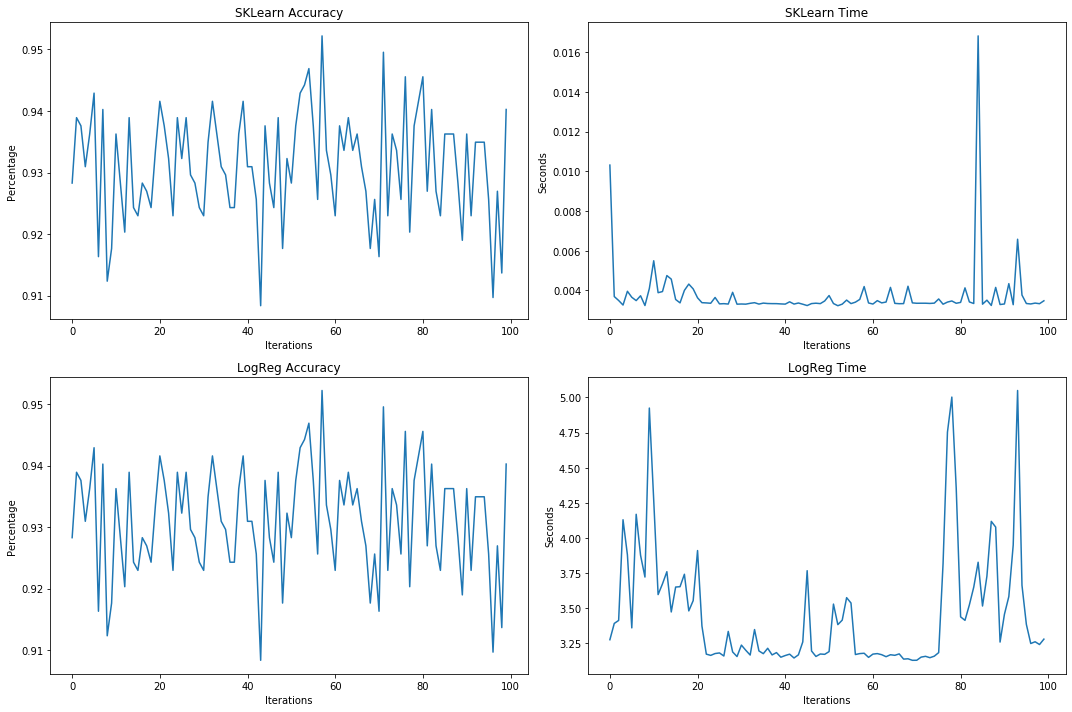

In [68]:
fig,a =  plt.subplots(2,2, figsize = (15,10))

a[0][0].plot(sklearnA)
a[0][0].set_title('SKLearn Accuracy')
a[0][0].set_xlabel("Iterations")
a[0][0].set_ylabel("Percentage")
a[0][1].plot(sklearnT)
a[0][1].set_title('SKLearn Time')
a[0][1].set_xlabel("Iterations")
a[0][1].set_ylabel("Seconds")
a[1][0].plot(logregA)
a[1][0].set_title('LogReg Accuracy')
a[1][0].set_xlabel("Iterations")
a[1][0].set_ylabel("Percentage")
a[1][1].plot(logregT)
a[1][1].set_title('LogReg Time')
a[1][1].set_xlabel("Iterations")
a[1][1].set_ylabel("Seconds")
plt.tight_layout()
plt.show()

As seen by the graphs above, the accuracy difference of SKLearn and Log Reg are not that significantly different.  However the 

## Deployment


Answer the question: Which classifier would you rather use and why?

I would deploy the sklearn implementation of logistic regression.  This is for three main reasons:
1. SKLearn is slightly faster than our implementation, which would make a difference if your data set was larger than 3762 observations.


2. SKLearn has better trained hyperparameters and better "internal" functionality.  Meaning, under the hood, sklearn has better, more efficient way to implement logistic regression.  This is part of the reason why their implementation is faster, and it is the reason why it is more accurate.


3. SKLearn if the desire to modify the logistic regression model is their, SKLearn already has many different implementations for it.  Meaning, you can chose more than just the regularization terms, their are more than 3 different sovlers, and there are other potentially useful bells and whistles SKLearn's implementation has that our implementation simply does not have.

## Exceptional Work

Update the code to use MSE.  This functionality has been implemented in the code above.